<a href="https://colab.research.google.com/github/Auzek2002/Credit-Card-Fraud_-Detection_ML/blob/main/credit_card_fraud_Task_1_codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **importing Dependencies**

In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [558]:
df = pd.read_csv("/content/fraudTrain.csv")

In [559]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [560]:
df.shape

(35041, 23)

In [561]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35041 non-null  int64  
 1   trans_date_trans_time  35041 non-null  object 
 2   cc_num                 35041 non-null  int64  
 3   merchant               35041 non-null  object 
 4   category               35041 non-null  object 
 5   amt                    35041 non-null  float64
 6   first                  35041 non-null  object 
 7   last                   35041 non-null  object 
 8   gender                 35041 non-null  object 
 9   street                 35041 non-null  object 
 10  city                   35041 non-null  object 
 11  state                  35041 non-null  object 
 12  zip                    35041 non-null  int64  
 13  lat                    35041 non-null  float64
 14  long                   35041 non-null  float64
 15  ci

In [563]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 1
dtype: int64

In [564]:
df.fillna(method='ffill')
mean_long = df['long'].mean()
df['long'].fillna(value=mean_long,inplace = True)

In [565]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 1
dtype: int64

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35041 non-null  int64  
 1   trans_date_trans_time  35041 non-null  object 
 2   cc_num                 35041 non-null  int64  
 3   merchant               35041 non-null  object 
 4   category               35041 non-null  object 
 5   amt                    35041 non-null  float64
 6   first                  35041 non-null  object 
 7   last                   35041 non-null  object 
 8   gender                 35041 non-null  object 
 9   street                 35041 non-null  object 
 10  city                   35041 non-null  object 
 11  state                  35041 non-null  object 
 12  zip                    35041 non-null  int64  
 13  lat                    35041 non-null  float64
 14  long                   35041 non-null  float64
 15  ci

In [567]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 1
dtype: int64

In [568]:
df['is_fraud'].value_counts()

0.0    34687
1.0      353
Name: is_fraud, dtype: int64

            Unnamed: 0    cc_num       amt       zip       lat      long  \
Unnamed: 0    1.000000 -0.005540  0.013426 -0.012179 -0.000238  0.010912   
cc_num       -0.005540  1.000000 -0.011944  0.048994 -0.064023 -0.054857   
amt           0.013426 -0.011944  1.000000 -0.016063  0.018531  0.008910   
zip          -0.012179  0.048994 -0.016063  1.000000 -0.111240 -0.906488   
lat          -0.000238 -0.064023  0.018531 -0.111240  1.000000 -0.024703   
long          0.010912 -0.054857  0.008910 -0.906488 -0.024703  1.000000   
city_pop     -0.005075 -0.006538  0.007383  0.080713 -0.160174 -0.053396   
unix_time     0.998881 -0.005269  0.013065 -0.012403 -0.000353  0.010867   
merch_lat    -0.000506 -0.063887  0.018289 -0.110516  0.993622 -0.024552   
merch_long    0.010496 -0.055119  0.009120 -0.905782 -0.024798  0.999135   
is_fraud      0.034742 -0.020660  0.309736 -0.036691  0.031730  0.013623   

            city_pop  unix_time  merch_lat  merch_long  is_fraud  
Unnamed: 0 -0.005075

<ipython-input-569-e57bd33c1388>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-569-e57bd33c1388>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<Axes: >

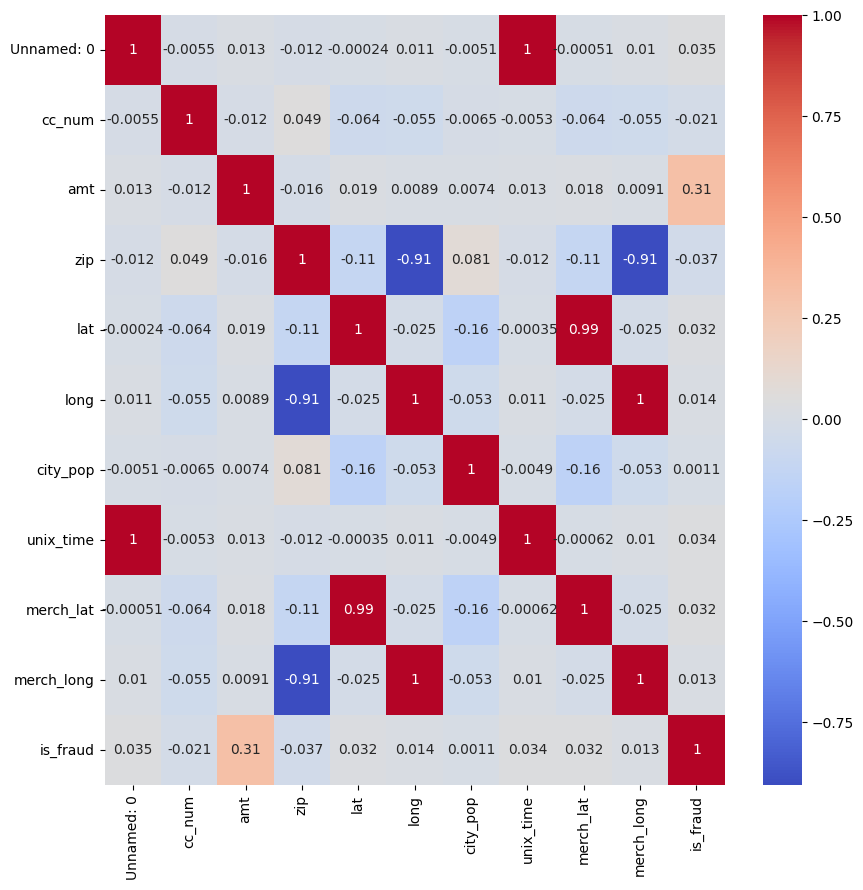

In [569]:
corr = df.corr()
print(df.corr())
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True , cmap = "coolwarm")

In [570]:
df['gender'] = pd.get_dummies(df['gender'],drop_first = True)

In [571]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [572]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [573]:
df['merchant'].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [574]:
df['city'].unique()

array(['Moravian Falls', 'Orient', 'Malad City', 'Boulder', 'Doe Hill',
       'Dublin', 'Holcomb', 'Edinburg', 'Manor', 'Clarksville',
       'Clarinda', 'Shenandoah Junction', 'Saint Petersburg', 'Grenada',
       'High Rolls Mountain Park', 'Harrington Park', 'Lahoma',
       'Carlisle', 'Harborcreek', 'Elizabeth', 'Methuen', 'Moulton',
       'Plainfield', 'May', 'Waukesha', 'Bailey', 'Romulus', 'Freedom',
       'Honokaa', 'Valentine', 'Westfir', 'Tiptonville', 'Republic',
       'Baton Rouge', 'Washington', 'Big Creek', 'Bellmore', 'Florence',
       'Allentown', 'Moriches', 'Esbon', 'Chatham', 'Thompson',
       'North Prairie', 'Laredo', 'Grant', 'Conway', 'New Goshen',
       'Sunflower', 'Enola', 'Roosevelt', 'Pointe Aux Pins', 'Dallas',
       'Jay', 'North Tonawanda', 'Athena', 'Chester', 'Elkhart',
       'Surrency', 'Arcadia', 'Gaithersburg', 'Bowdoin', 'Heart Butte',
       'San Jose', 'Rumely', 'Cranks', 'Ravenna', 'Utica', 'Uledi',
       'Naples', 'Thida', 'Parks', 'C

In [575]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI'], dtype=object)

In [576]:
df['zip'].unique()

array([28654, 99160, 83252, 59632, 24433, 18917, 67851, 22824, 15665,
       37040, 51632, 25442, 33710, 96038, 88325,  7640, 73754, 47838,
       16421,  7208,  1844, 52572,  7060, 76857, 53186, 27807, 48174,
       83120, 96727, 69201, 97492, 38079, 49879, 70808, 20012, 40914,
       11710, 39073, 18103, 11955, 66941, 12037, 84540, 53153, 78040,
       35747, 98238, 47863, 38778, 72047, 73564, 49775, 75210, 32565,
       14120, 97813, 21619, 50073, 31563, 49613, 20882,  4287, 59448,
       95148, 49826, 40820, 68869, 67584, 15484, 34112, 72165, 86018,
       47110, 82514, 22719, 39825,  1545, 56117, 16048, 43985, 80120,
        5461, 64659, 49628, 84532, 44412, 29819, 23860, 90250, 20895,
       89319, 51521, 52768, 75092, 33470, 71762, 15324, 15056, 82227,
       11978, 10162, 56548,  7711, 93529, 97476, 68950, 36009,  1612,
       68881, 22853, 15432, 73027, 42701, 13342, 39653, 61454, 70531,
       13615, 23937, 63021, 95537, 33417, 12992, 24266, 36749, 22015,
       50595, 66070,

In [577]:
df['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [578]:
df['dob'].unique()

array(['1988-03-09', '1978-06-21', '1962-01-19', '1967-01-12',
       '1986-03-28', '1961-06-19', '1993-08-16', '1947-08-21',
       '1941-03-07', '1974-03-28', '1990-07-13', '1966-02-14',
       '1989-02-28', '1945-12-21', '1967-08-30', '1965-06-30',
       '1952-07-06', '1938-03-15', '1946-02-02', '1980-12-21',
       '1980-11-22', '1961-02-14', '1974-07-19', '1965-07-26',
       '1946-01-02', '1962-08-13', '1971-11-05', '1967-08-02',
       '1966-12-03', '1945-03-15', '1961-05-19', '1964-12-30',
       '1964-04-22', '1977-02-22', '1970-07-20', '1984-06-04',
       '1970-10-21', '1984-12-24', '1998-10-01', '1988-04-27',
       '1987-07-18', '1971-10-14', '1987-04-23', '1942-01-06',
       '1971-01-28', '1972-07-25', '1984-09-01', '1960-01-06',
       '1986-11-06', '1954-01-05', '1970-09-27', '1994-02-09',
       '1942-11-24', '1994-11-05', '1993-10-25', '1976-10-18',
       '1981-02-15', '1974-03-13', '1926-07-12', '1966-12-21',
       '1936-03-28', '1997-08-22', '1972-05-04', '1955-

In [579]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [580]:
x = df.drop(['Unnamed: 0','trans_date_trans_time','cc_num', 'merchant', 'category','first', 'last', 'street', 'city', 'state', 'zip',
             'city_pop', 'job', 'dob', 'trans_num','merch_long','merch_lat','unix_time','is_fraud'],axis=1,inplace=False)
y = df['is_fraud']

In [581]:
x.head()

,amt,gender,lat,long
0,4.97,0,36.0788,-81.1781
1,107.23,0,48.8878,-118.2105
2,220.11,1,42.1808,-112.2620
3,45.00,1,46.2306,-112.1138
4,41.96,1,38.4207,-79.4629


In [582]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_fraud, dtype: float64

**Checking if data is balanced or not**

In [583]:
y.value_counts()

0.0    34687
1.0      353
Name: is_fraud, dtype: int64

In [584]:
y.isnull().sum()

1

In [585]:
mean = y.mean()
y.fillna(value=mean, inplace=True)

In [586]:
y.isnull().sum()

0

In [587]:
y = y.astype('int')

In [588]:
x.isnull().sum()

amt       0
gender    0
lat       0
long      0
dtype: int64

In [589]:
mean2 = x['long'].mean()
x['long'].fillna(value=mean2, inplace=True)

In [590]:
x.isnull().sum()

amt       0
gender    0
lat       0
long      0
dtype: int64

**Solving the problem of unbalanced data by over sampling**

In [591]:
x_sampled , y_sampled = SMOTE().fit_resample(x,y)

In [592]:
y_sampled.value_counts()

0    34688
1    34688
Name: is_fraud, dtype: int64

In [593]:
x_sampled.shape

(69376, 4)

In [594]:
y_sampled.shape

(69376,)

In [595]:
x_sampled.describe()

,amt,gender,lat,long
count,69376.000000,69376.000000,69376.000000,69376.000000
mean,295.158008,0.350597,39.240218,-88.794530
std,369.946829,0.477160,5.504912,16.249350
min,1.000000,0.000000,20.027100,-165.672300
25%,20.660000,0.000000,36.115000,-95.959600
50%,90.785000,0.000000,39.888200,-83.484500
75%,379.139815,1.000000,41.954532,-78.235052
max,11872.210000,1.000000,65.689900,-67.950300


In [596]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=2)

In [597]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(55500, 4) (13876, 4) (55500,) (13876,)


**Scaling The input features**

Before Scaling:

In [598]:
print(x_train)

               amt  gender        lat        long
53016  1101.575158       0  39.561766  -75.266105
62605     9.826693       0  36.224132  -77.484131
56526   991.238812       0  45.432355 -103.704655
48885    11.480366       1  42.175740  -79.941769
17882     1.950000       1  39.885400 -105.113900
...            ...     ...        ...         ...
53922   927.255437       1  41.452786  -82.528838
44295   368.306084       0  43.652408  -72.056552
33867    48.590000       1  44.155400  -72.484700
31019    67.480000       1  35.859600  -86.421000
44566   343.777964       0  43.736588  -97.825461

[55500 rows x 4 columns]


In [599]:
print(x_test)

              amt  gender        lat        long
37112  931.707457       1  41.030717  -83.025195
68483  275.935637       0  31.666122  -98.544541
64136  305.348315       0  39.547577  -87.312255
35700   20.906736       0  41.481206  -80.207254
3706    32.620000       0  38.242700 -122.914500
...           ...     ...        ...         ...
22334    8.940000       1  31.645300  -90.180100
25699   35.390000       0  40.454200  -98.653800
24230   49.060000       0  31.957100  -98.965600
11854   73.850000       0  41.480200  -86.691900
37520  298.666978       1  40.337180  -79.700341

[13876 rows x 4 columns]


After Scaling:

In [600]:
scaler = StandardScaler()

In [601]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [602]:
print(x_train)

[[ 2.17834899 -0.73272454  0.05898786  0.83214888]
 [-0.76892908 -0.73272454 -0.54797333  0.69523942]
 [ 1.88048561 -0.73272454  1.12657677 -0.92324398]
 ...
 [-0.66428387  1.36476937  0.89435761  1.0038334 ]
 [-0.61328854  1.36476937 -0.61426494  0.14360384]
 [ 0.13260391 -0.73272454  0.81819505 -0.56034586]]


In [603]:
print(x_test)

[[ 1.71977509  1.36476937  0.32612214  0.3532127 ]
 [-0.05054286 -0.73272454 -1.37686469 -0.60473169]
 [ 0.02885944 -0.73272454  0.05640757  0.0885904 ]
 ...
 [-0.66301506 -0.73272454 -1.32394929 -0.6307219 ]
 [-0.59609212 -0.73272454  0.40786239  0.12688231]
 [ 0.01082254  1.36476937  0.19999997  0.55844201]]


# **Model training using Logistic Regression**

In [604]:
model = LogisticRegression()

In [605]:
model.fit(x_train,y_train)


LogisticRegression()

**Evaluating the model on Training Data:**

In [606]:
x_train_pred = model.predict(x_train)

In [607]:
print(f"Accuracy Score for Training data: {accuracy_score(y_train,x_train_pred)}")
print(f"Precision Score for Training data: {precision_score(y_train,x_train_pred)}")
print(f"Recall Score for Training data: {recall_score(y_train,x_train_pred)}")
print(f"F1 Score for Training data: {f1_score(y_train,x_train_pred)}")

Accuracy Score for Training data: 0.8408828828828829
Precision Score for Training data: 0.9052298752350025
Recall Score for Training data: 0.7621137450987445
F1 Score for Training data: 0.8275296369353358


**Evaluating the model on Testing Data:**

In [608]:
x_test_pred = model.predict(x_test)

In [609]:
print(f"Accuracy Score for Training data: {accuracy_score(y_test,x_test_pred)}")
print(f"Precision Score for Training data: {precision_score(y_test,x_test_pred)}")
print(f"Recall Score for Training data: {recall_score(y_test,x_test_pred)}")
print(f"F1 Score for Training data: {f1_score(y_test,x_test_pred)}")

Accuracy Score for Training data: 0.8456327471893917
Precision Score for Training data: 0.904965023033612
Recall Score for Training data: 0.7699230657570039
F1 Score for Training data: 0.832


# **Model training using Decision Trees**

In [610]:
dt_clf = DecisionTreeClassifier()

In [611]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

**Evaluating the model on Training Data:**

In [612]:
y_pred = dt_clf.predict(x_train)

In [613]:
print(f"Accuracy Score for Training data: {accuracy_score(y_train,y_pred)}")
print(f"Precision Score for Training data: {precision_score(y_train,y_pred)}")
print(f"Recall Score for Training data: {recall_score(y_train,y_pred)}")
print(f"F1 Score for Training data: {f1_score(y_train,y_pred)}")

Accuracy Score for Training data: 0.999981981981982
Precision Score for Training data: 1.0
Recall Score for Training data: 0.999964027483003
F1 Score for Training data: 0.9999820134179902


**Evaluating the model on Testing Data:**

In [614]:
y_pred_dt = dt_clf.predict(x_test)

In [615]:
print(f"Accuracy Score for Testing data: {accuracy_score(y_test,y_pred_dt)}")
print(f"Precision Score for Testing data: {precision_score(y_test,y_pred_dt)}")
print(f"Recall Score for Testing data: {recall_score(y_test,y_pred_dt)}")
print(f"F1 Score for Testing data: {f1_score(y_test,y_pred_dt)}")

Accuracy Score for Testing data: 0.9819832804842894
Precision Score for Testing data: 0.980182265297266
Recall Score for Testing data: 0.9835970387574394
F1 Score for Testing data: 0.9818866830894073


# **Model training using Random Forest**

In [616]:
rf_clf = RandomForestClassifier()

In [617]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

**Evaluating the model on Training Data:**

In [618]:
y_pred1 = rf_clf.predict(x_train)

In [619]:
print(f"Accuracy Score for Training data: {accuracy_score(y_train,y_pred1)}")
print(f"Precision Score for Training data: {precision_score(y_train,y_pred1)}")
print(f"Recall Score for Training data: {recall_score(y_train,y_pred1)}")
print(f"F1 Score for Training data: {f1_score(y_train,y_pred1)}")

Accuracy Score for Training data: 0.999981981981982
Precision Score for Training data: 0.9999640287769784
Recall Score for Training data: 1.0
F1 Score for Training data: 0.9999820140650012


**Evaluating the model on Testing Data:**

In [620]:
y_pred_rf = rf_clf.predict(x_test)

In [621]:
print(f"Accuracy Score for Testing data: {accuracy_score(y_test,y_pred_rf)}")
print(f"Precision Score for Testing data: {precision_score(y_test,y_pred_rf)}")
print(f"Recall Score for Testing data: {recall_score(y_test,y_pred_rf)}")
print(f"F1 Score for Testing data: {f1_score(y_test,y_pred_rf)}")

Accuracy Score for Testing data: 0.9879648313635053
Precision Score for Testing data: 0.9840149769585254
Recall Score for Testing data: 0.9918710988532443
F1 Score for Testing data: 0.9879274199378298


# **Model training using SVC**

In [622]:
svc_clf = SVC()

In [623]:
svc_clf.fit(x_train,y_train)

SVC()

**Evaluating the model on Training Data:**

In [624]:
y_pred2 = svc_clf.predict(x_train)

In [625]:
print(f"Accuracy Score for Training data: {accuracy_score(y_train,y_pred2)}")
print(f"Precision Score for Training data: {precision_score(y_train,y_pred2)}")
print(f"Recall Score for Training data: {recall_score(y_train,y_pred2)}")
print(f"F1 Score for Training data: {f1_score(y_train,y_pred2)}")

Accuracy Score for Training data: 0.8905945945945946
Precision Score for Training data: 0.9060969683376322
Recall Score for Training data: 0.8719378394906292
F1 Score for Training data: 0.8886892758936755


**Evaluating the model on Testing Data:**

In [626]:
y_pred_svc = svc_clf.predict(x_test)

In [627]:
print(f"Accuracy Score for Testing data: {accuracy_score(y_test,y_pred_svc)}")
print(f"Precision Score for Testing data: {precision_score(y_test,y_pred_svc)}")
print(f"Recall Score for Testing data: {recall_score(y_test,y_pred_svc)}")
print(f"F1 Score for Testing data: {f1_score(y_test,y_pred_svc)}")

Accuracy Score for Testing data: 0.8925482848083021
Precision Score for Testing data: 0.9004451038575668
Recall Score for Testing data: 0.8809696617796487
F1 Score for Testing data: 0.8906009244992296


# **Model training using KNN**

In [628]:
knn_clf = KNeighborsClassifier()

In [629]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

**Evaluating the model on Training Data:**

In [630]:
y_pred3 = knn_clf.predict(x_train)

In [631]:
print(f"Accuracy Score for Training data: {accuracy_score(y_train,y_pred3)}")
print(f"Precision Score for Training data: {precision_score(y_train,y_pred3)}")
print(f"Recall Score for Training data: {recall_score(y_train,y_pred3)}")
print(f"F1 Score for Training data: {f1_score(y_train,y_pred3)}")

Accuracy Score for Training data: 0.9863603603603603
Precision Score for Training data: 0.9800468650145565
Recall Score for Training data: 0.9929853591855822
F1 Score for Training data: 0.9864736889127131


**Evaluating the model on Testing Data:**

In [632]:
y_pred_knn = knn_clf.predict(x_test)

In [633]:
print(f"Accuracy Score for Testing data: {accuracy_score(y_test,y_pred_knn)}")
print(f"Precision Score for Testing data: {precision_score(y_test,y_pred_knn)}")
print(f"Recall Score for Testing data: {recall_score(y_test,y_pred_knn)}")
print(f"F1 Score for Testing data: {f1_score(y_test,y_pred_knn)}")

Accuracy Score for Testing data: 0.9795330066301527
Precision Score for Testing data: 0.9726635179619293
Recall Score for Testing data: 0.9865002177384236
F1 Score for Testing data: 0.9795330066301527


## **Checking The Best Accuracy Score using a barplot (For Training Data)**

In [634]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [635]:
acc = [0.8402702702702702,0.999981981981982,0.999981981981982,0.8921801801801802,0.9861981981981982]
names = ['Logistic','DecisonTrees','RandomForest','SVC','KNN']
new_acc = np.around(acc,decimals=5)

Text(0, 0.5, 'Accuracy')

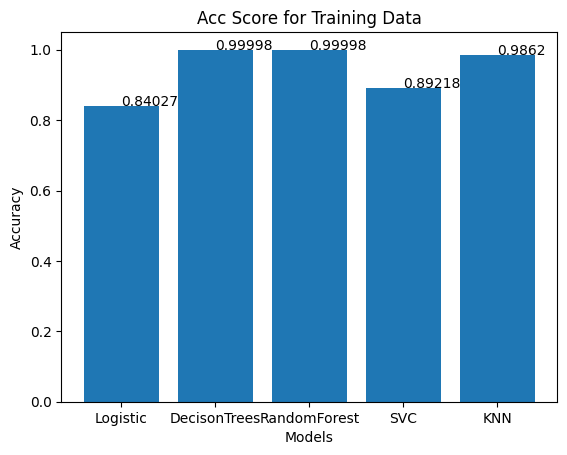

In [636]:
plt.bar(names,new_acc)
addlabels(names, new_acc)
plt.title('Acc Score for Training Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# **Checking The Best Accuracy Score using a barplot (For Testing Data)**

In [637]:
acc2 = [0.8399394638224272,0.9835687518016719,0.988108965119631,0.8908186797347939,0.9816229460939752]
new_acc2 = np.around(acc2,decimals=5)

Text(0, 0.5, 'Accuracy')

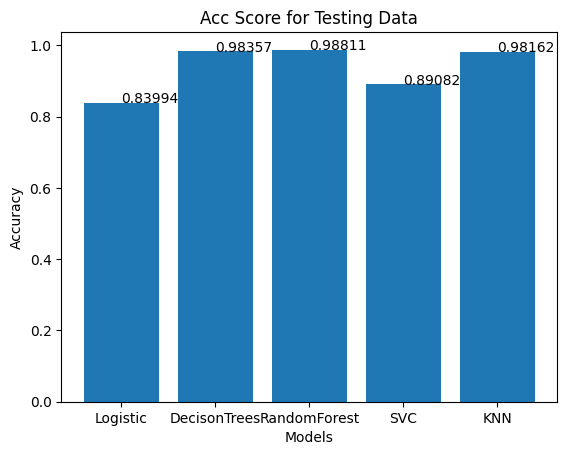

In [638]:
plt.bar(names,new_acc2)
addlabels(names, new_acc2)
plt.title('Acc Score for Testing Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')